In [4]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [5]:
data = np.loadtxt('dataset/seeds_dataset.txt', delimiter='\t')
num_row, num_col = data.shape

In [6]:
np.random.seed(2018)
train = np.random.choice([True, False], num_row, replace=True, p=[0.5,0.5])

x_train = data[train,:-1]
y_train = data[train,-1].astype(int)
x_test = data[~train,:-1]
y_test = data[~train,-1].astype(int)


In [7]:
#selecting only column 4 and 7 for the model, as given in question
x_train = x_train[:,[3,6]]
x_test = x_test[:,[3,6]]

In [8]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(103, 2) (103,) (107, 2) (107,)


In [9]:
# c value is 10, as given in question
logit = linear_model.LogisticRegression(C=10.0)
logit.fit(x_train,y_train)

C:\Users\nithy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nithy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [10]:
y_train_pred = logit.predict(x_train)
y_test_pred = logit.predict(x_test)

## Scatter plot to visualize the data

In [11]:
color = ['black','red', 'green','blue'] 
#adding additional color black to represent 0 index, which will be skipped, 
#as there are no classes with 0 value in the dataset (only classes 1,2,3)
y_color = [color[i] for i in y_train]

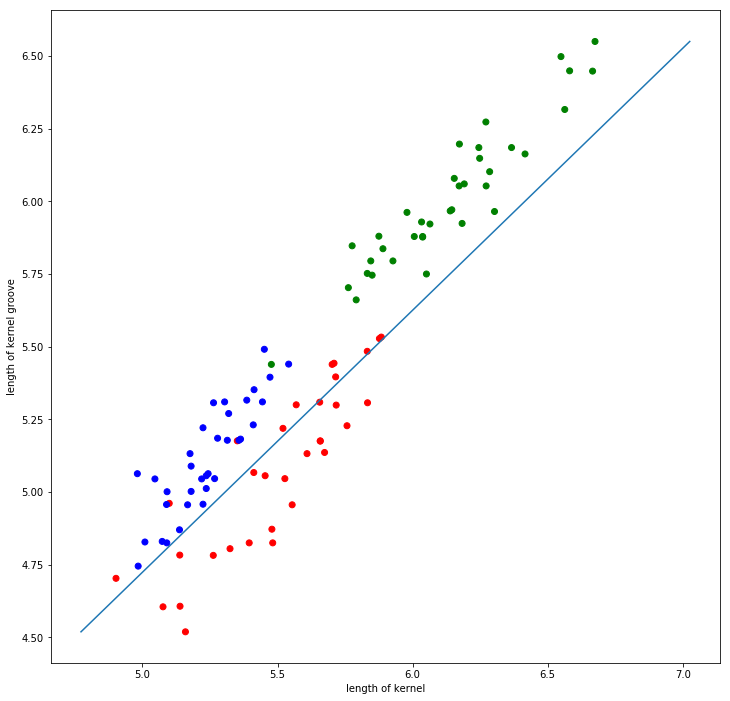

In [12]:
plt.figure(figsize=(12, 12))
plt.xlabel('length of kernel')
plt.ylabel('length of kernel groove')
plt.scatter(x_train[:,0], x_train[:,1], c=y_color)
plt.plot((- logit.coef_[0][1] * np.array((min(x_train[:,1]), max(x_train[:,1]))) - logit.intercept_[0]) / logit.coef_[0][0], np.array((min(x_train[:,1]), max(x_train[:,1]))))
plt.show()

# Class Probabilities Contour

In [13]:
def my_linspace(min_value, max_value, steps):
    diff = max_value - min_value
    return np.linspace(min_value - 0.1 * diff, max_value + 0.1 * diff, steps)

In [14]:
steps = 200
x0 = my_linspace(min(x_train[:,0]), max(x_train[:,1]), steps)
x1 = my_linspace(min(x_train[:,0]), max(x_train[:,1]), steps)
xx0, xx1 = np.meshgrid(x0, x1)
mesh_data = np.c_[xx0.ravel(), xx1.ravel()]
# there are 3 classifiers
mesh_proba = logit.predict_proba(mesh_data).reshape(steps, steps, 3)

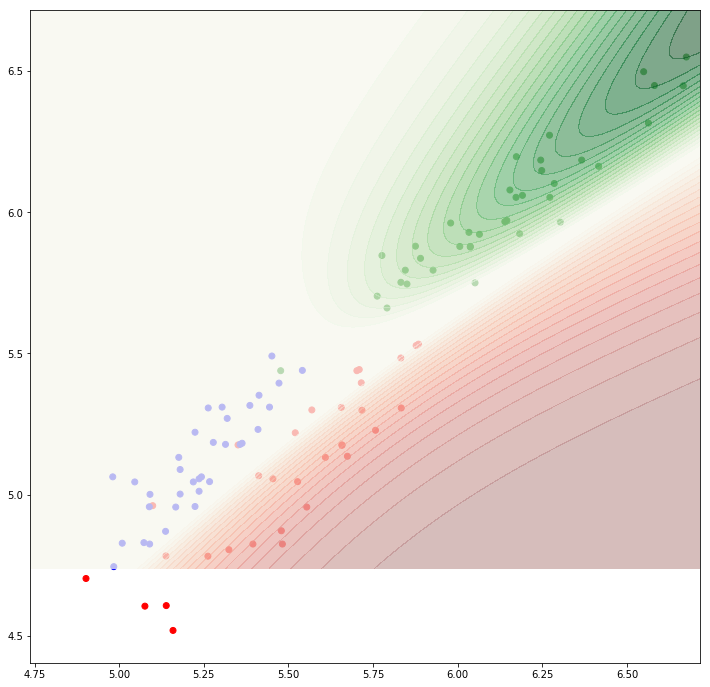

In [15]:
contour_color = [plt.cm.Reds, plt.cm.Greens]
plt.figure(figsize=(12, 12))
plt.scatter(x_train[:,0], x_train[:,1], c=y_color)
for i in range(2):
    plt.contourf(xx0, xx1, np.maximum(mesh_proba[:,:,i], 0.5), 20, cmap=contour_color[i], alpha=0.5)
plt.show()

In [16]:
#The size of test set: ________________________ 
print(x_test.shape,y_test.shape, x_test.size, y_test.size)

(107, 2) (107,) 214 107


In [17]:
#Printing the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_test_pred)
print(confusion_matrix)

[[35  2  1]
 [ 0 32  1]
 [ 1  0 35]]


In [18]:
#As discusssed in lecture 5 (slide 35), score is calculated by TP+TN / (TP+TN+FP+FN). 
# Here predicting a class with correct label is True Positive. We don't consider TN in this 3 class model
#So diagonal elements represent correct predictions (TP) in this confusion matrix.
calcTP = np.trace(confusion_matrix) #35+32+35 - trace function sums up the diagonal elements in the matrix
print("Calculated True Positive  is " + str(calcTP))
calcEverything = confusion_matrix.sum() # sum of all elements - 35+32+35+2+1+1+1
print(calcEverything)
calcScore = calcTP/calcEverything
print("Calculated score is 102/107 = " + str(calcScore))


Calculated True Positive  is 102
107
Calculated score is 102/107 = 0.9532710280373832


### Calculated score is 102/107 = 0.9532710280373832

In [19]:
C = 10.0
score = logit.score(x_test,y_test)
print('Score from sklearn for test data is ' + str(score))


Score from sklearn for test data is 0.9532710280373832


## Plot on original dataset

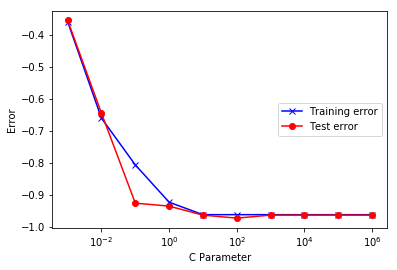

In [20]:
#plotting Training error and test error with trade-off C parameter
errorValTrain,errorValTest, params = [], [], []
for c in np.arange(-3, 7):
    powerval = np.float_power(10,c)
    
    logitreg = linear_model.LogisticRegression(C=powerval,solver='newton-cg',multi_class='multinomial')
    
    logitreg.fit(x_train, y_train)
    #log likelihood is returned by score function
    errorValTrain.append(-logitreg.score(x_train, y_train))
    
    logitreg.fit(x_test, y_test)
    errorValTest.append(-logitreg.score(x_test, y_test))
    
    params.append(powerval)

errorValTrain = np.array(errorValTrain)
errorValTest = np.array(errorValTest)

plt.plot(params, errorValTrain, color='blue', marker='x', label='Training error')
plt.plot(params, errorValTest, color='red',  marker='o', label='Test error')
plt.ylabel('Error')
plt.xlabel('C Parameter')
plt.legend(loc='right')
plt.xscale('log')
plt.show()

## Min Max Scaling and Standard Scaling on training and test dataset

In [21]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale

In [22]:
MMscaler = MinMaxScaler(copy=True)
#scale the training data using MinMax Scaler
x_train_MM = MMscaler.fit_transform(x_train)
x_test_MM = MMscaler.fit_transform(x_test)

In [23]:
stdscaler = StandardScaler(copy=True)
#scale the training data using standard scaler
x_train_std = stdscaler.fit_transform(x_train)
x_test_std = stdscaler.fit_transform(x_test)

## Plot after using Min-Max Scaler on the dataset

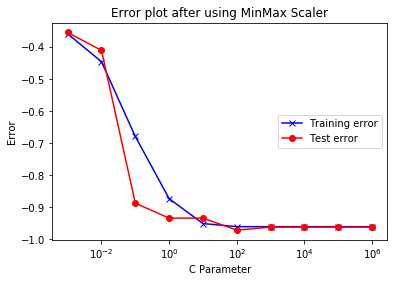

In [24]:
errorValTrainMM,errorValTestMM, paramsMM = [], [], []
for c in np.arange(-3, 7):
    powerval = np.float_power(10,c)
    
    logitreg = linear_model.LogisticRegression(C=powerval,solver='newton-cg',multi_class='multinomial')
    #using x_train_MM as input
    logitreg.fit(x_train_MM, y_train)
    errorValTrainMM.append(-logitreg.score(x_train_MM, y_train))
    
    logitreg.fit(x_test_MM, y_test)
    errorValTestMM.append(-logitreg.score(x_test_MM, y_test))
    
    paramsMM.append(powerval)

errorValTrainMM = np.array(errorValTrainMM)
errorValTestMM = np.array(errorValTestMM)

plt.plot(paramsMM, errorValTrainMM, color='blue', marker='x', label='Training error')
plt.plot(paramsMM, errorValTestMM, color='red',  marker='o', label='Test error')
plt.ylabel('Error')
plt.xlabel('C Parameter')
plt.title('Error plot after using MinMax Scaler')
plt.legend(loc='right')
plt.xscale('log')
plt.show()

## Plot after using Standard Scaler on the dataset

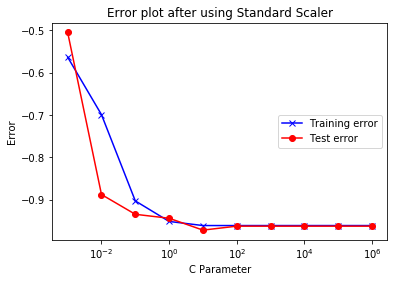

In [25]:
errorValTrainStd,errorValTestStd, paramsStd = [], [], []
for c in np.arange(-3, 7):
    powerval = np.float_power(10,c)
    
    logitreg = linear_model.LogisticRegression(C=powerval,solver='newton-cg',multi_class='multinomial')
    #using x_train_MM as input
    logitreg.fit(x_train_std, y_train)
    errorValTrainStd.append(-logitreg.score(x_train_std, y_train))
    
    logitreg.fit(x_test_std, y_test)
    errorValTestStd.append(-logitreg.score(x_test_std, y_test))
    
    paramsStd.append(powerval)

errorValTrainStd = np.array(errorValTrainStd)
errorValTestStd = np.array(errorValTestStd)

plt.plot(paramsStd, errorValTrainStd, color='blue', marker='x', label='Training error')
plt.plot(paramsStd, errorValTestStd, color='red',  marker='o', label='Test error')
plt.ylabel('Error')
plt.xlabel('C Parameter')
plt.title('Error plot after using Standard Scaler')
plt.legend(loc='right')
plt.xscale('log')
plt.show()

##### In general we should choose C such that the difference between training error and test error is minimum. From the above plots, we see that as C value increases, the difference between training error and test error is minimized. This is common observation for original and scaled data sets. So for this data set, it is better to choose higher values of C. It remains constant when C is more than 1000. There is no change in the difference between training error and test error, after C reaches 1000.